In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [3]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [5]:
x_train = x_train.reshape(-1, 28,28,1)
x_test = x_test.reshape(-1, 28,28,1)

x_train_norma = x_train.reshape(-1, 28,28,1)/ 255.0
x_test_norma = x_test.reshape(-1, 28,28,1)/ 255.0

In [6]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),

    layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu'), 
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    
    layers.Flatten(),
    layers.Dense(16, activation='relu'),
    
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                6416      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [7]:
model_adam=model
model_sgd=model
model_rmsprop=model

In [8]:
model_adam.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [9]:
model_sgd.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [10]:
model_rmsprop.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [11]:
h = model_adam.fit(x=x_train, y=y_train, epochs=5,validation_split=0.2, batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.8117 - accuracy: 0.7778 - val_loss: 0.2064 - val_accuracy: 0.9458
Epoch 2/5
1500/1500 [==============================] - 11s 8ms/step - loss: 0.1429 - accuracy: 0.9597 - val_loss: 0.1187 - val_accuracy: 0.9683
Epoch 3/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0890 - accuracy: 0.9745 - val_loss: 0.0947 - val_accuracy: 0.9732
Epoch 4/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0686 - accuracy: 0.9804 - val_loss: 0.0957 - val_accuracy: 0.9747
Epoch 5/5
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0586 - accuracy: 0.9834 - val_loss: 0.0824 - val_accuracy: 0.9791


In [12]:
test_loss, test_acc = model_adam.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0639 - accuracy: 0.9814

Test accuracy: 0.9814000129699707


In [13]:
x = model_sgd.fit(x=x_train, y=y_train, epochs=5 ,validation_split=0.2, batch_size=32)


Epoch 1/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0533 - accuracy: 0.9846 - val_loss: 0.0888 - val_accuracy: 0.9783
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0467 - accuracy: 0.9871 - val_loss: 0.0792 - val_accuracy: 0.9821
Epoch 3/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0435 - accuracy: 0.9882 - val_loss: 0.0908 - val_accuracy: 0.9779
Epoch 4/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0393 - accuracy: 0.9889 - val_loss: 0.1167 - val_accuracy: 0.9734
Epoch 5/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0379 - accuracy: 0.9891 - val_loss: 0.0866 - val_accuracy: 0.9815


In [14]:
test_loss, test_acc = model_sgd.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0794 - accuracy: 0.9819

Test accuracy: 0.9818999767303467


In [15]:
y = model_rmsprop.fit(x=x_train, y=y_train, epochs=5 ,validation_split=0.2, batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0388 - accuracy: 0.9900 - val_loss: 0.0919 - val_accuracy: 0.9804
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0354 - accuracy: 0.9901 - val_loss: 0.0878 - val_accuracy: 0.9785
Epoch 3/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0347 - accuracy: 0.9909 - val_loss: 0.1004 - val_accuracy: 0.9816
Epoch 4/5
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0357 - accuracy: 0.9905 - val_loss: 0.1266 - val_accuracy: 0.9758
Epoch 5/5
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0332 - accuracy: 0.9912 - val_loss: 0.1073 - val_accuracy: 0.9803


In [16]:
test_loss, test_acc = model_rmsprop.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)


313/313 [==============================] - 1s 4ms/step - loss: 0.0888 - accuracy: 0.9825

Test accuracy: 0.9825000166893005


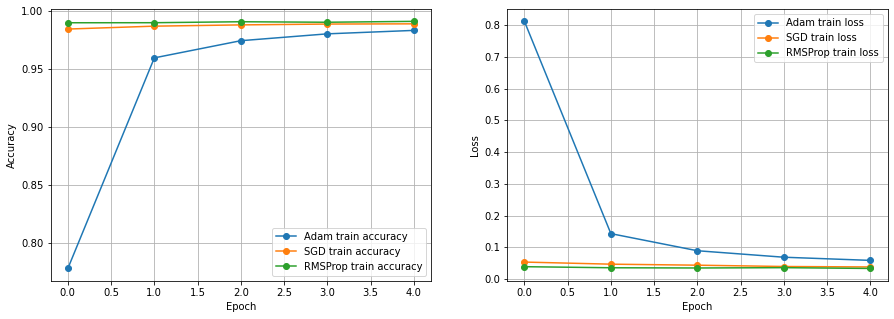

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='Adam train accuracy')
plt.plot(x.history['accuracy'], 'o-', label='SGD train accuracy')
plt.plot(y.history['accuracy'], 'o-', label='RMSProp train accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='Adam train loss')
plt.plot(x.history['loss'], 'o-', label='SGD train loss')
plt.plot(y.history['loss'], 'o-', label='RMSProp train loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [18]:
h_norma = model_adam.fit(x=x_train_norma, y=y_train, epochs=5,validation_split=0.2, batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2604 - accuracy: 0.9240 - val_loss: 0.0862 - val_accuracy: 0.9752
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0690 - accuracy: 0.9786 - val_loss: 0.0674 - val_accuracy: 0.9779
Epoch 3/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0556 - accuracy: 0.9827 - val_loss: 0.0609 - val_accuracy: 0.9822
Epoch 4/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0473 - accuracy: 0.9849 - val_loss: 0.0551 - val_accuracy: 0.9834
Epoch 5/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0409 - accuracy: 0.9875 - val_loss: 0.0590 - val_accuracy: 0.9842


In [19]:
test_loss, test_acc = model_adam.evaluate(x_test_norma, y_test)
print('\nTest accuracy:', test_acc)


313/313 [==============================] - 1s 4ms/step - loss: 0.0504 - accuracy: 0.9852: 0s - loss: 0.0

Test accuracy: 0.9851999878883362


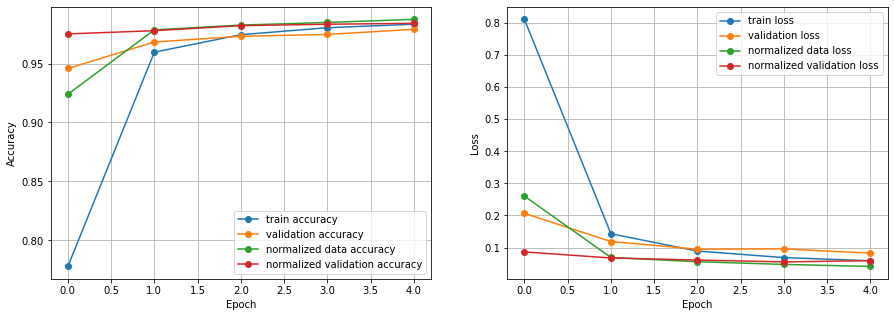

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.plot(h_norma.history['accuracy'], 'o-', label = 'normalized data accuracy')
plt.plot(h_norma.history['val_accuracy'], 'o-', label = 'normalized validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.plot(h_norma.history['loss'], 'o-', label='normalized data loss')
plt.plot(h_norma.history['val_loss'], 'o-', label='normalized validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()


In [21]:
predictions = model_adam.predict(x_test)

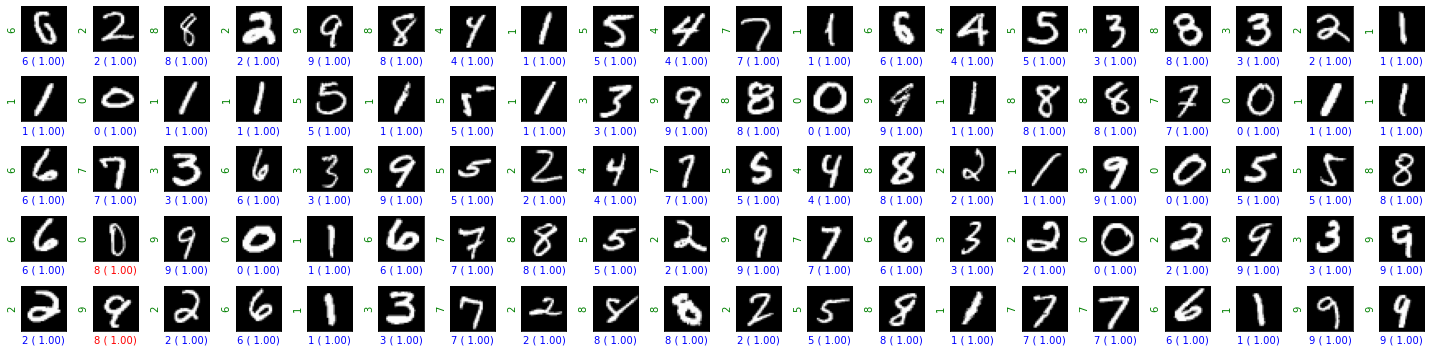

In [22]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model_adam.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()